In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf
import math
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
#nifty = pdr.get_data_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
df = yf.download('^GSPC',start="2011-01-31", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-23 00:00:00-05:00,2042.199951,2064.729980,2042.199951,2064.290039,2064.290039,3484090000
2015-12-24 00:00:00-05:00,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
2015-12-28 00:00:00-05:00,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000
2015-12-29 00:00:00-05:00,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000
2015-12-30 00:00:00-05:00,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2011-01-31 00:00:00-05:00 to 2015-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1238 non-null   float64
 1   High       1238 non-null   float64
 2   Low        1238 non-null   float64
 3   Close      1238 non-null   float64
 4   Adj Close  1238 non-null   float64
 5   Volume     1238 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.7 KB


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-31 00:00:00-05:00,1276.500000,1287.170044,1276.500000,1286.119995,1286.119995,4167160000
2011-02-01 00:00:00-05:00,1289.140015,1308.859985,1289.140015,1307.589966,1307.589966,5164500000
2011-02-02 00:00:00-05:00,1305.910034,1307.609985,1302.619995,1304.030029,1304.030029,4098260000
2011-02-03 00:00:00-05:00,1302.770020,1308.599976,1294.829956,1307.099976,1307.099976,4370990000
2011-02-04 00:00:00-05:00,1307.010010,1311.000000,1301.670044,1310.869995,1310.869995,3925950000
...,...,...,...,...,...,...
2015-12-23 00:00:00-05:00,2042.199951,2064.729980,2042.199951,2064.290039,2064.290039,3484090000
2015-12-24 00:00:00-05:00,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
2015-12-28 00:00:00-05:00,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000


In [6]:
df["Return"] = df["Adj Close"].pct_change()

In [7]:
df1 = df.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [8]:
df1

,Close,Return
Date,,
2011-01-31 00:00:00-05:00,1286.119995,NaN
2011-02-01 00:00:00-05:00,1307.589966,0.016694
2011-02-02 00:00:00-05:00,1304.030029,-0.002723
2011-02-03 00:00:00-05:00,1307.099976,0.002354
2011-02-04 00:00:00-05:00,1310.869995,0.002884
...,...,...
2015-12-23 00:00:00-05:00,2064.290039,0.012418
2015-12-24 00:00:00-05:00,2060.989990,-0.001599
2015-12-28 00:00:00-05:00,2056.500000,-0.002179


In [9]:
df1["Log_Return"] = np.log(1+df1["Return"])

In [10]:
df1 = df1.dropna()

In [11]:
df2 = df1["Log_Return"]

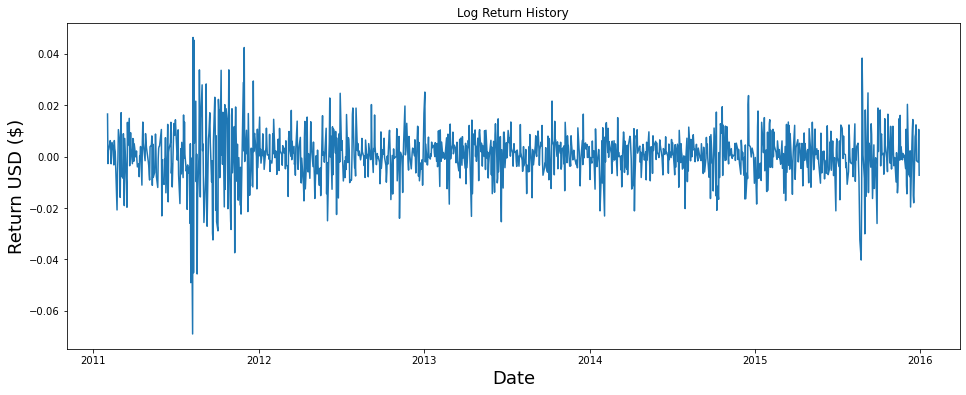

In [12]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(df2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [14]:
df3

array([[ 1.65094369],
       [-0.31729026],
       [ 0.20101782],
       ...,
       [-0.26162878],
       [ 1.04031133],
       [-0.77838528]])

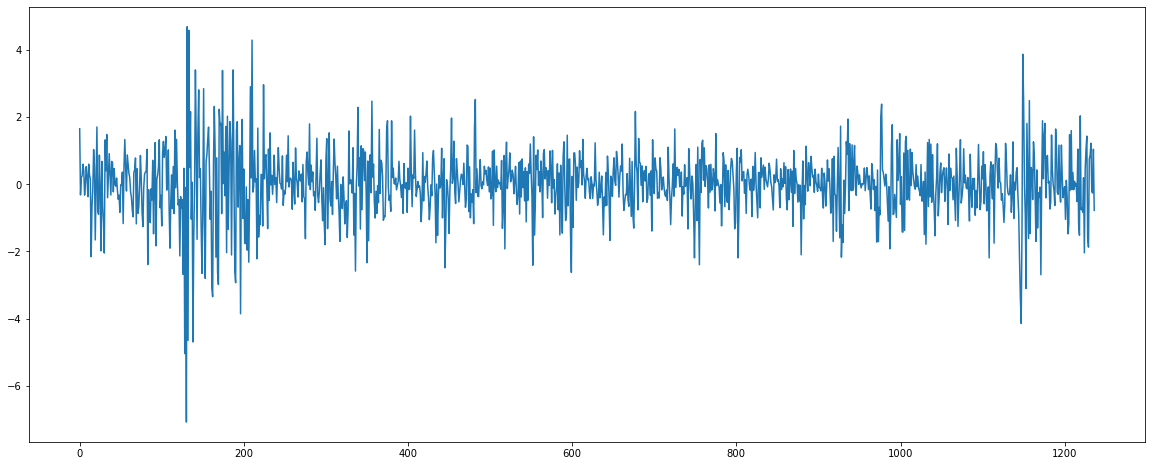

In [15]:
plt.figure(figsize = (20,8))
plt.plot(df3)

In [16]:
train_size = int(len(df3)*0.8)
test_size = len(df3)-train_size
train_size,test_size

(989, 248)

In [17]:
train_data,test_data = df3[0:train_size],df3[train_size:]

In [18]:
train_data.shape,test_data.shape

((989, 1), (248, 1))

In [19]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [20]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [21]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[ 1.65094369, -0.31729026,  0.20101782, ..., -0.44858594,
         -0.32454359, -0.83592525],
        [-0.31729026,  0.20101782,  0.2549833 , ..., -0.32454359,
         -0.83592525, -0.01959059],
        [ 0.20101782,  0.2549833 ,  0.59598605, ..., -0.83592525,
         -0.01959059, -0.03046623],
        ...,
        [ 0.88999934,  1.93977613, -0.78682717, ...,  0.29826346,
          0.04892146, -0.53924077],
        [ 1.93977613, -0.78682717,  1.20921071, ...,  0.04892146,
         -0.53924077, -1.09696329],
        [-0.78682717,  1.20921071,  0.67845415, ..., -0.53924077,
         -1.09696329, -0.07371533]]),
 array([[ 1.14127192,  1.77081947, -0.9004605 , ..., -0.37848157,
          1.19459298, -0.53759694],
        [ 1.77081947, -0.9004605 , -0.86854075, ...,  1.19459298,
         -0.53759694,  0.87685868],
        [-0.9004605 , -0.86854075, -0.3025561 , ..., -0.53759694,
          0.87685868, -0.21736043],
        ...,
        [-0.52156505,  1.46595722,  0.4264661 , ...,  

In [22]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.272216,-0.052316,0.033145,0.042043,0.098269,0.063854,-0.053384,0.006178,0.086008,0.033661,...,0.105703,-0.037252,0.076893,-0.000623,-0.009462,0.030281,-0.032034,-0.073965,-0.053512,-0.137831
1,-0.054369,0.034445,0.043693,0.102125,0.066360,-0.055479,0.006421,0.089382,0.034982,-0.063358,...,-0.038714,0.079910,-0.000647,-0.009834,0.031470,-0.033291,-0.076867,-0.055612,-0.143240,-0.003357
2,0.034496,0.043757,0.102275,0.066457,-0.055560,0.006430,0.089514,0.035033,-0.063451,0.102576,...,0.080027,-0.000648,-0.009848,0.031516,-0.033340,-0.076980,-0.055694,-0.143450,-0.003362,-0.005228
3,0.043699,0.102140,0.066369,-0.055487,0.006422,0.089395,0.034987,-0.063368,0.102440,0.047038,...,-0.000647,-0.009835,0.031474,-0.033296,-0.076879,-0.055620,-0.143261,-0.003357,-0.005221,0.061851
4,0.100239,0.065134,-0.054454,0.006302,0.087732,0.034335,-0.062188,0.100534,0.046162,0.026452,...,-0.009652,0.030888,-0.032676,-0.075448,-0.054585,-0.140594,-0.003295,-0.005124,0.060700,-0.196767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,-0.004250,0.222564,0.156246,0.340543,-0.138134,0.212286,0.119108,-0.033777,0.205836,-0.031691,...,-0.299781,-0.120871,-0.159623,0.354211,0.418424,0.074862,0.061307,0.024420,-0.009344,0.052362
934,0.222558,0.156242,0.340533,-0.138130,0.212280,0.119105,-0.033776,0.205830,-0.031690,0.104448,...,-0.120867,-0.159618,0.354201,0.418413,0.074860,0.061305,0.024419,-0.009344,0.052361,0.008588
935,0.159511,0.347659,-0.141020,0.216722,0.121597,-0.034483,0.210137,-0.032353,0.106634,0.206382,...,-0.162958,0.361612,0.427168,0.076426,0.062588,0.024930,-0.009540,0.053457,0.008768,-0.096646
936,0.345385,-0.140098,0.215305,0.120801,-0.034257,0.208763,-0.032142,0.105936,0.205032,-0.009107,...,0.359247,0.424374,0.075926,0.062178,0.024767,-0.009477,0.053107,0.008711,-0.096014,-0.195319


<AxesSubplot:>

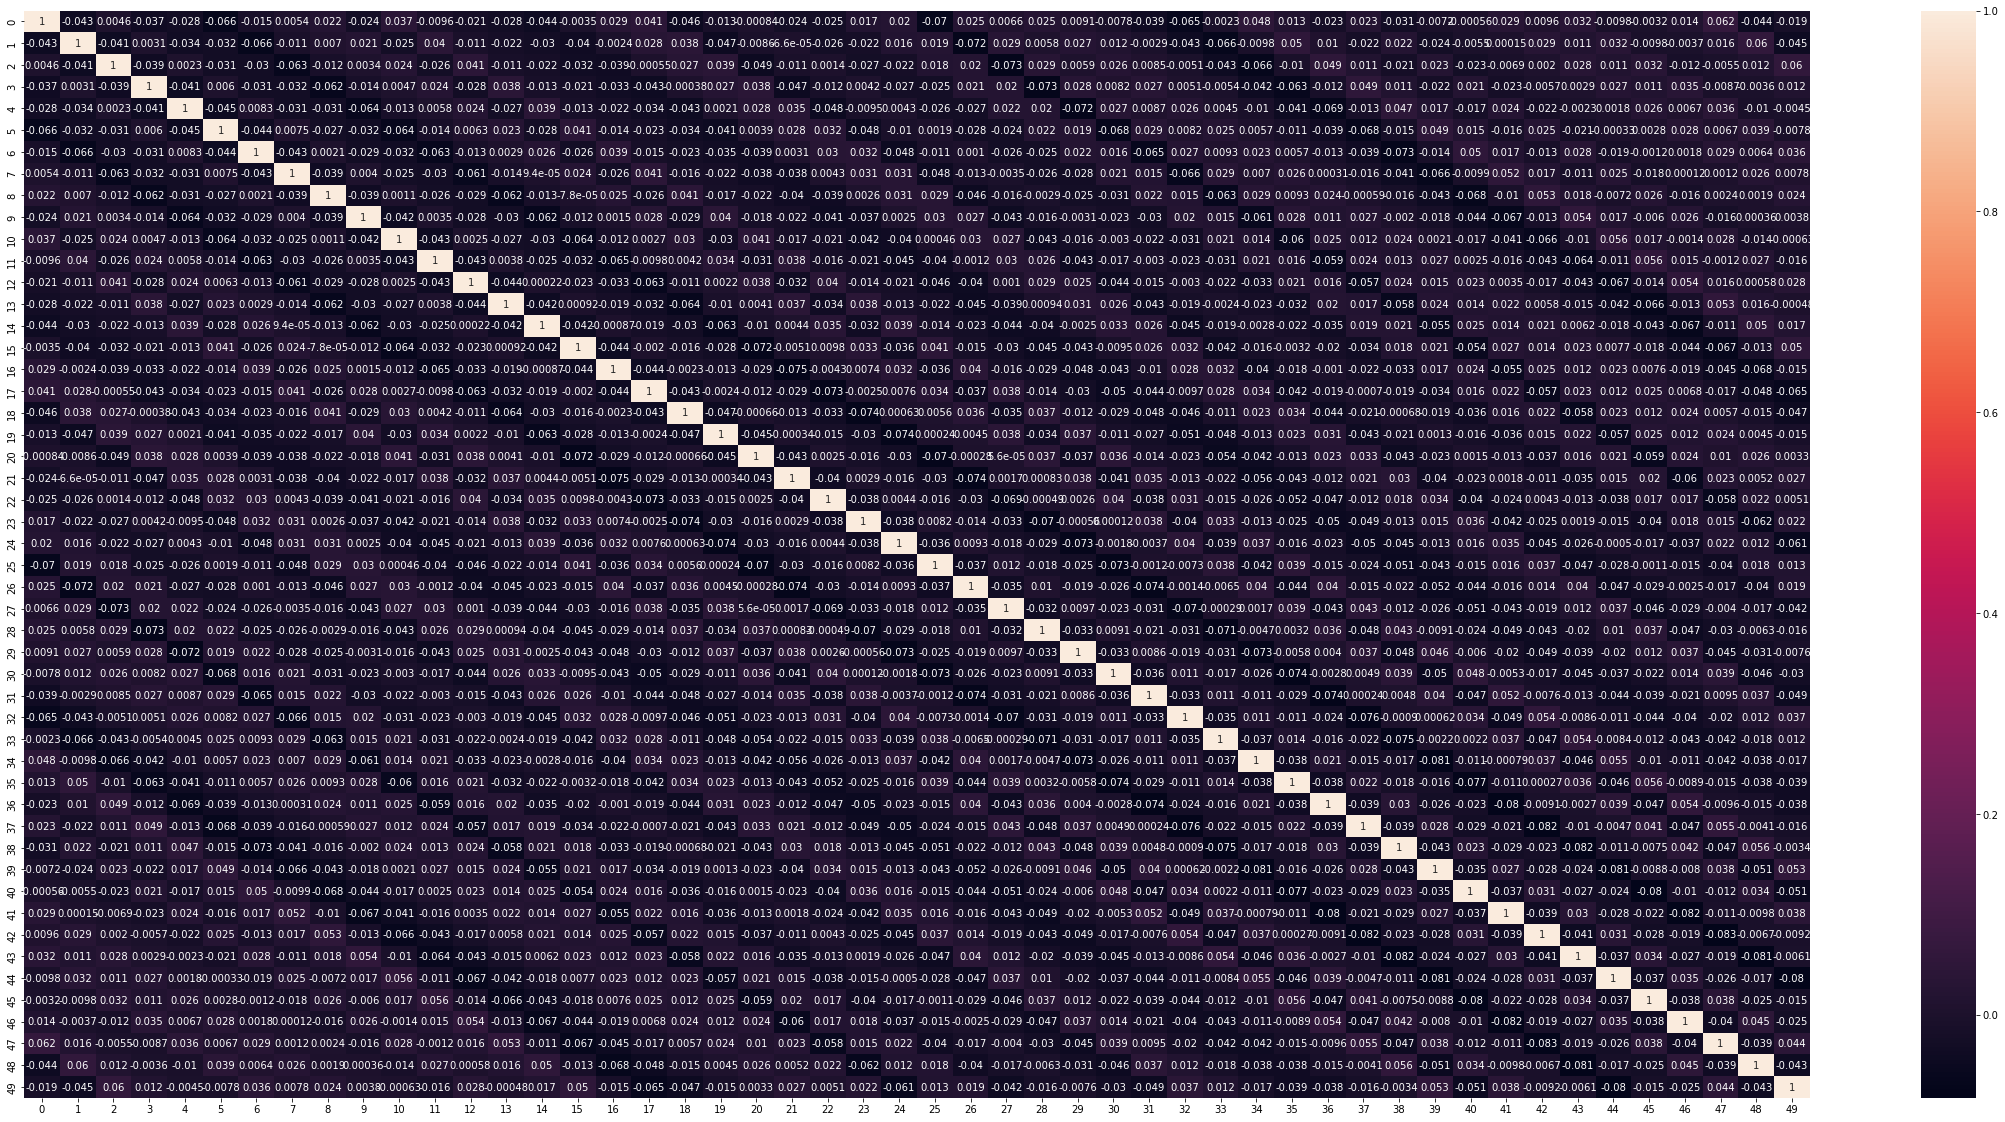

In [23]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [24]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [25]:
x_train.shape, x_test.shape

((938, 50, 1), (197, 50, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 9, verbose = 1)

Epoch 1/100
105/105 [==============================] - 20s 116ms/step - loss: 1.0210 - val_loss: 1.0393
Epoch 2/100
105/105 [==============================] - 8s 77ms/step - loss: 1.0206 - val_loss: 1.0530
Epoch 3/100
105/105 [==============================] - 10s 92ms/step - loss: 1.0212 - val_loss: 1.0422
Epoch 4/100
105/105 [==============================] - 9s 88ms/step - loss: 1.0195 - val_loss: 1.0400
Epoch 5/100
105/105 [==============================] - 10s 93ms/step - loss: 1.0173 - val_loss: 1.0378
Epoch 6/100
105/105 [==============================] - 8s 79ms/step - loss: 1.0200 - val_loss: 1.0411
Epoch 7/100
105/105 [==============================] - 9s 88ms/step - loss: 1.0194 - val_loss: 1.0403
Epoch 8/100
105/105 [==============================] - 9s 83ms/step - loss: 1.0184 - val_loss: 1.0354
Epoch 9/100
105/105 [==============================] - 9s 83ms/step - loss: 1.0177 - val_loss: 1.0396
Epoch 10/100
105/105 [==============================] - 9s 88ms/step - loss: 1

105/105 [==============================] - 11s 104ms/step - loss: 0.6011 - val_loss: 1.6904
Epoch 81/100
105/105 [==============================] - 11s 105ms/step - loss: 0.5659 - val_loss: 1.7942
Epoch 82/100
105/105 [==============================] - 11s 105ms/step - loss: 0.5605 - val_loss: 1.7919
Epoch 83/100
105/105 [==============================] - 11s 103ms/step - loss: 0.5727 - val_loss: 1.6874
Epoch 84/100
105/105 [==============================] - 11s 104ms/step - loss: 0.5579 - val_loss: 1.6019
Epoch 85/100
105/105 [==============================] - 11s 105ms/step - loss: 0.5473 - val_loss: 1.7869
Epoch 86/100
105/105 [==============================] - 11s 106ms/step - loss: 0.5293 - val_loss: 1.8270
Epoch 87/100
105/105 [==============================] - 11s 103ms/step - loss: 0.5322 - val_loss: 1.6202
Epoch 88/100
105/105 [==============================] - 11s 103ms/step - loss: 0.5300 - val_loss: 1.7406
Epoch 89/100
105/105 [==============================] - 11s 104ms/st

In [30]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

7/7 [==============================] - 0s 40ms/step


(array([[ 4.71649587e-01],
        [-4.54816997e-01],
        [-9.05009434e-02],
        [ 2.44927078e-01],
        [-2.85101920e-01],
        [ 1.83306843e-01],
        [ 1.22749604e-01],
        [-1.19332023e-01],
        [-4.46151309e-02],
        [ 1.72426969e-01],
        [ 3.50933909e-01],
        [ 2.94645995e-01],
        [-5.97406365e-02],
        [-2.87326843e-01],
        [-2.64201641e-01],
        [-1.75819069e-01],
        [-1.70308083e-01],
        [-2.53267765e-01],
        [-3.31734449e-01],
        [-2.88727164e-01],
        [ 9.23416674e-01],
        [-2.28549719e-01],
        [-1.43545151e-01],
        [ 2.81077951e-01],
        [ 3.52495372e-01],
        [ 7.05841556e-02],
        [-2.58012086e-01],
        [-3.35008532e-01],
        [-5.52471340e-01],
        [-4.45271581e-01],
        [ 6.10121131e-01],
        [ 1.48171580e+00],
        [ 5.54285087e-02],
        [-1.12392890e+00],
        [-2.62545705e-01],
        [-4.98196542e-01],
        [-6.94011986e-01],
 

In [31]:
train_pred.shape

(938, 1)

In [32]:
y_train.shape, train_pred.shape

((938,), (938, 1))

In [33]:
def accuracy_LSTM(data_1, data_2):
    x = (np.sign(np.array(data_1)) == np.sign(np.array(data_2)))
    
    return print(sum(x[0]) / len(x))

In [34]:
accuracy_LSTM(train_pred, y_train)

0.5181236673773987


In [66]:
accuracy_LSTM(test_pred, y_test)

0.47715736040609136


In [35]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.64


In [36]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 1.34


In [37]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred.shape, test_pred.shape

((938, 1), (197, 1))

In [38]:
math.sqrt(mean_squared_error(y_train, train_pred))

1.0030782208687818

In [39]:
math.sqrt(mean_squared_error(y_test, test_pred))

1.0207382898863888

In [40]:
df3.shape

(1237, 1)

In [41]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [42]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df3)-1, :] = test_pred

In [43]:
testPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [ 0.00601449],
       [-0.0159001 ],
       [        nan]])

In [44]:
df3 = scaler.inverse_transform(df3)

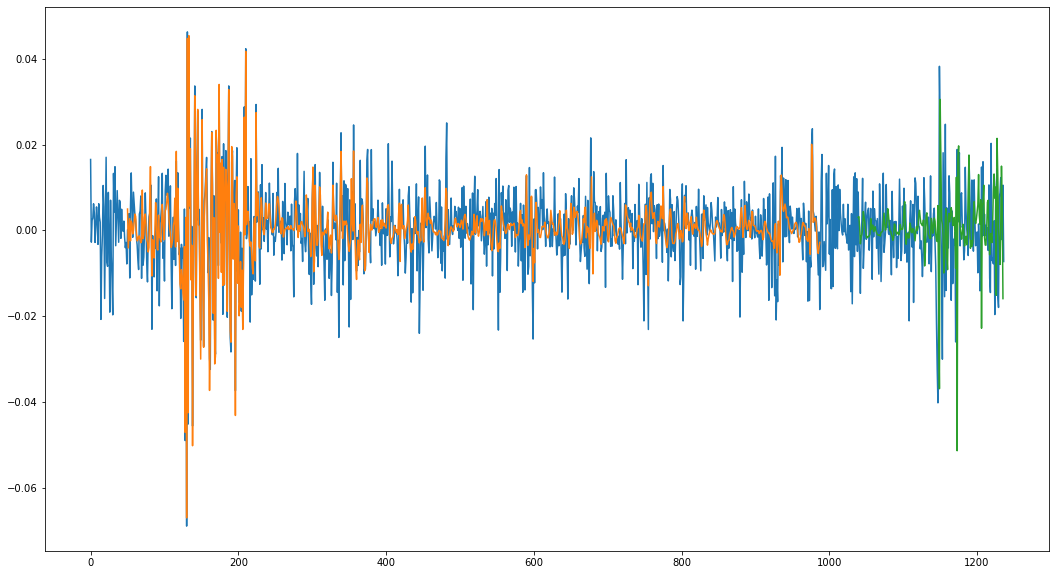

In [45]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot((df3))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

In [46]:
len(train_data),len(test_data)

(989, 248)

In [47]:
time_stamp = 50
var = len(test_data)-time_stamp
x_input = test_data[var:].reshape(1,-1)
x_input.shape

(1, 50)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.53807795]
51


In [50]:
lst_output = scaler.inverse_transform(lst_output)

In [51]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df3)

1237

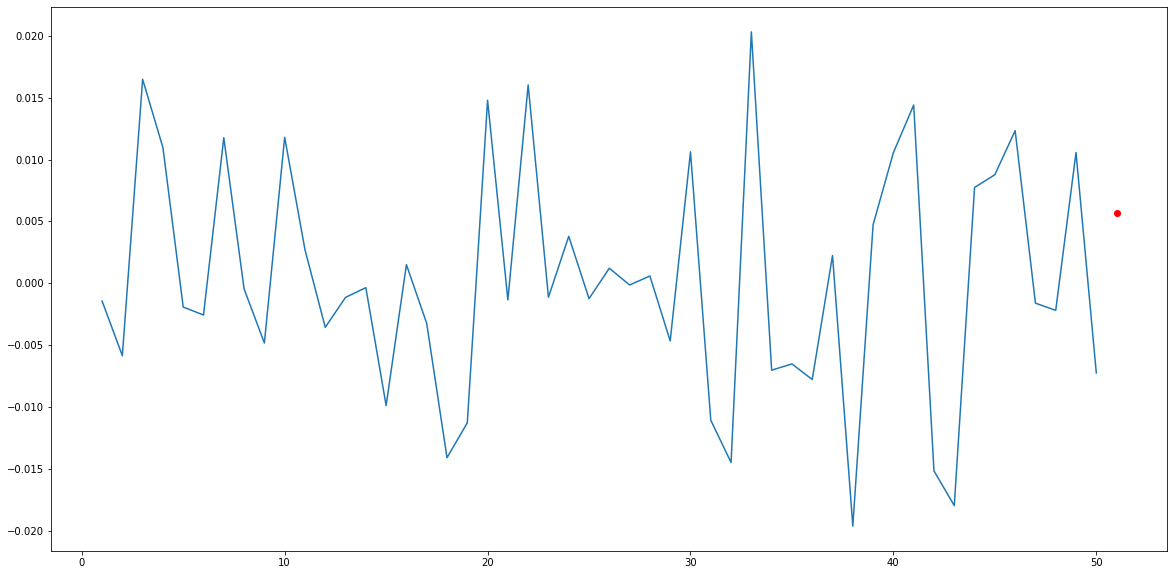

In [54]:
var_1 = len(df3)-time_stamp
plt.figure(figsize = (20,10))
plt.plot(day_new,(df3[var_1:]))
plt.scatter(day_pred,(lst_output), c = "r")

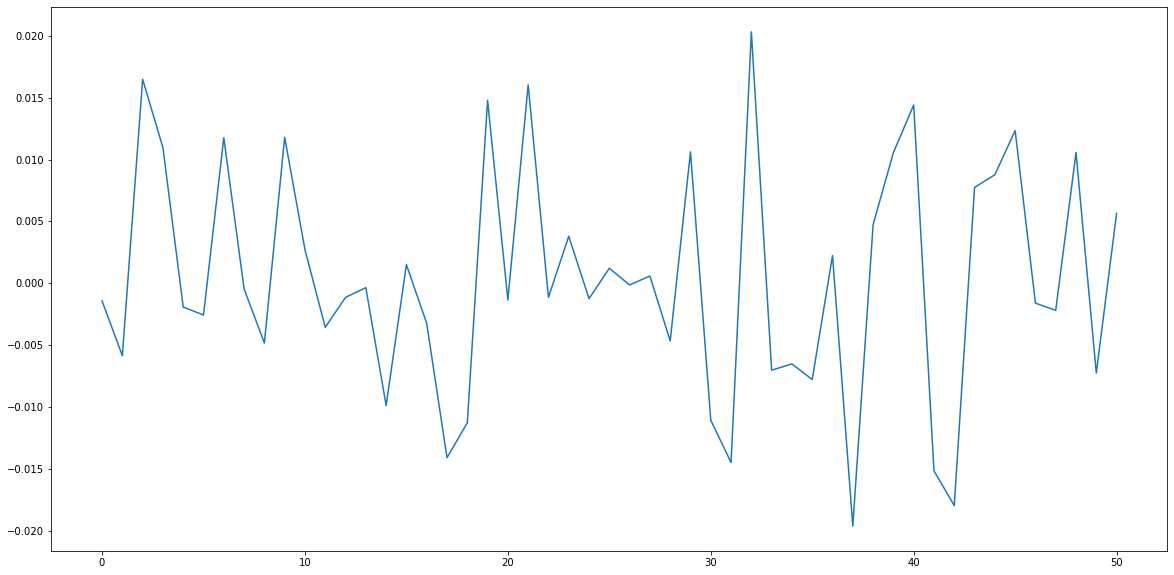

In [55]:
plt.figure(figsize = (20,10))
df3 = df3.tolist()
df3.extend((lst_output))
plt.plot((df3[var_1:]))

In [56]:
check_df = yf.download('^GSPC',start="2015-12-01", end="2016-01-03",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [57]:
check_df["Close"].tail(10)

Date
2015-12-17 00:00:00-05:00    2041.890015
2015-12-18 00:00:00-05:00    2005.550049
2015-12-21 00:00:00-05:00    2021.150024
2015-12-22 00:00:00-05:00    2038.969971
2015-12-23 00:00:00-05:00    2064.290039
2015-12-24 00:00:00-05:00    2060.989990
2015-12-28 00:00:00-05:00    2056.500000
2015-12-29 00:00:00-05:00    2078.360107
2015-12-30 00:00:00-05:00    2063.360107
2015-12-31 00:00:00-05:00    2043.939941
Name: Close, dtype: float64

In [58]:
check_df.to_csv("^GSPC_check.csv")

In [59]:
check_df = pd.read_csv("^GSPC_check.csv")

In [60]:
check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       22 non-null     object 
 1   Open       22 non-null     float64
 2   High       22 non-null     float64
 3   Low        22 non-null     float64
 4   Close      22 non-null     float64
 5   Adj Close  22 non-null     float64
 6   Volume     22 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [61]:
check_df["Date"] = pd.to_datetime(check_df["Date"])

In [62]:
check_df = check_df.set_index("Date")

In [63]:
check_df["Return"] = check_df.Close.pct_change()

In [64]:
check_df1 = check_df["Return"].dropna()
check_df1,df1[1425:]

(Date
 2015-12-02 00:00:00-05:00   -0.010996
 2015-12-03 00:00:00-05:00   -0.014374
 2015-12-04 00:00:00-05:00    0.020526
 2015-12-07 00:00:00-05:00   -0.006990
 2015-12-08 00:00:00-05:00   -0.006490
 2015-12-09 00:00:00-05:00   -0.007739
 2015-12-10 00:00:00-05:00    0.002251
 2015-12-11 00:00:00-05:00   -0.019423
 2015-12-14 00:00:00-05:00    0.004756
 2015-12-15 00:00:00-05:00    0.010619
 2015-12-16 00:00:00-05:00    0.014515
 2015-12-17 00:00:00-05:00   -0.015041
 2015-12-18 00:00:00-05:00   -0.017797
 2015-12-21 00:00:00-05:00    0.007778
 2015-12-22 00:00:00-05:00    0.008817
 2015-12-23 00:00:00-05:00    0.012418
 2015-12-24 00:00:00-05:00   -0.001599
 2015-12-28 00:00:00-05:00   -0.002179
 2015-12-29 00:00:00-05:00    0.010630
 2015-12-30 00:00:00-05:00   -0.007217
 2015-12-31 00:00:00-05:00   -0.009412
 Name: Return, dtype: float64,
 Empty DataFrame
 Columns: [Close, Return, Log_Return]
 Index: [])

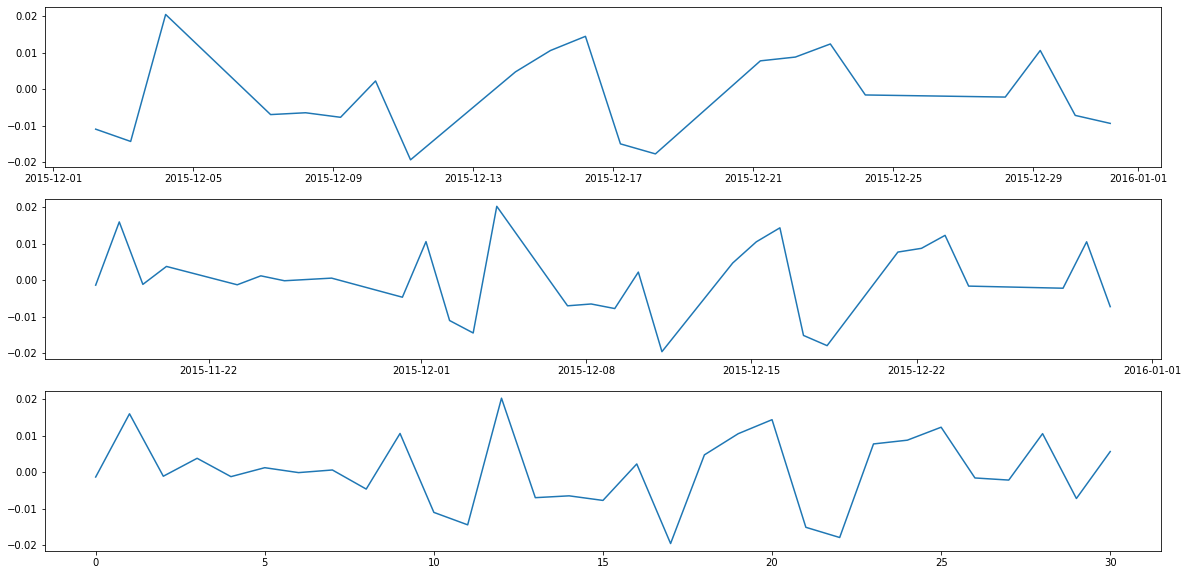

In [65]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_df1);
plt.subplot(3,1,2)
plt.plot(df2[var_1+20:])
plt.subplot(3,1,3)
plt.plot((df3[var_1+20:]))